<a href="https://colab.research.google.com/github/blindblackcat/assets/blob/main/Homework001zoomcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
!pip install yfinance

In [163]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import datetime
from datetime import date

In [164]:
SP500ListLink="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
SP500=pd.read_html(SP500ListLink)


In [165]:
SP500Stocks = SP500[0]
SP500Changes = SP500[1]

In [166]:
SP500Stocks

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [167]:
SP500Changes

Date  Added                                Removed  \
                   Date Ticker                       Security  Ticker   
0          May 19, 2025   COIN                       Coinbase     DFS   
1        March 24, 2025   DASH                       DoorDash     BWA   
2        March 24, 2025    TKO             TKO Group Holdings     TFX   
3        March 24, 2025    WSM          Williams-Sonoma, Inc.      CE   
4        March 24, 2025    EXE                  Expand Energy     FMC   
..                  ...    ...                            ...     ...   
367   December 11, 1998   CPWR                      Compuware     SUN   
368       June 17, 1997    CCI  Countrywide Credit Industries     USL   
369  September 30, 1994    NCC                  National City     MCK   
370        July 1, 1976    BUD                 Anheuser Busch     HNG   
371        July 1, 1976    DIS        The Walt Disney Company     AYE   

                                                                     Reason  
                Security                                             Reason  
0     Discover Financial  S&P 500 constituent Capital One Financial Corp...  
1             BorgWarner                   Market capitalization change.[5]  
2               Teleflex                   Market capitalization change.[5]  
3               Celanese                   Market capitalization change.[5]  
4        FMC Corporation                   Market capitalization change.[5]  
..                   ...                                                ...  
367           SunAmerica                     AIG purchased SunAmerica.[262]  
368               USLife                          AIG acquired USLife.[263]  
369             McKesson  McKesson sold PCS Health Services to Eli Lilly...  
370  Houston Natural Gas  Major restructuring of S&P 500 to have fewer i...  
371     Allegheny Energy  Major restructuring of S&P 500 to have fewer i...  

[372 rows x 6 columns]

In [168]:
SP500Stocks["Date added"]=pd.to_datetime(SP500Stocks["Date added"])

In [169]:
pt=pd.pivot_table(SP500Stocks,values="Security",index="Date added",aggfunc="count")

In [170]:
yearly=pt.resample("YE").sum().sort_values(by="Security",ascending=False)

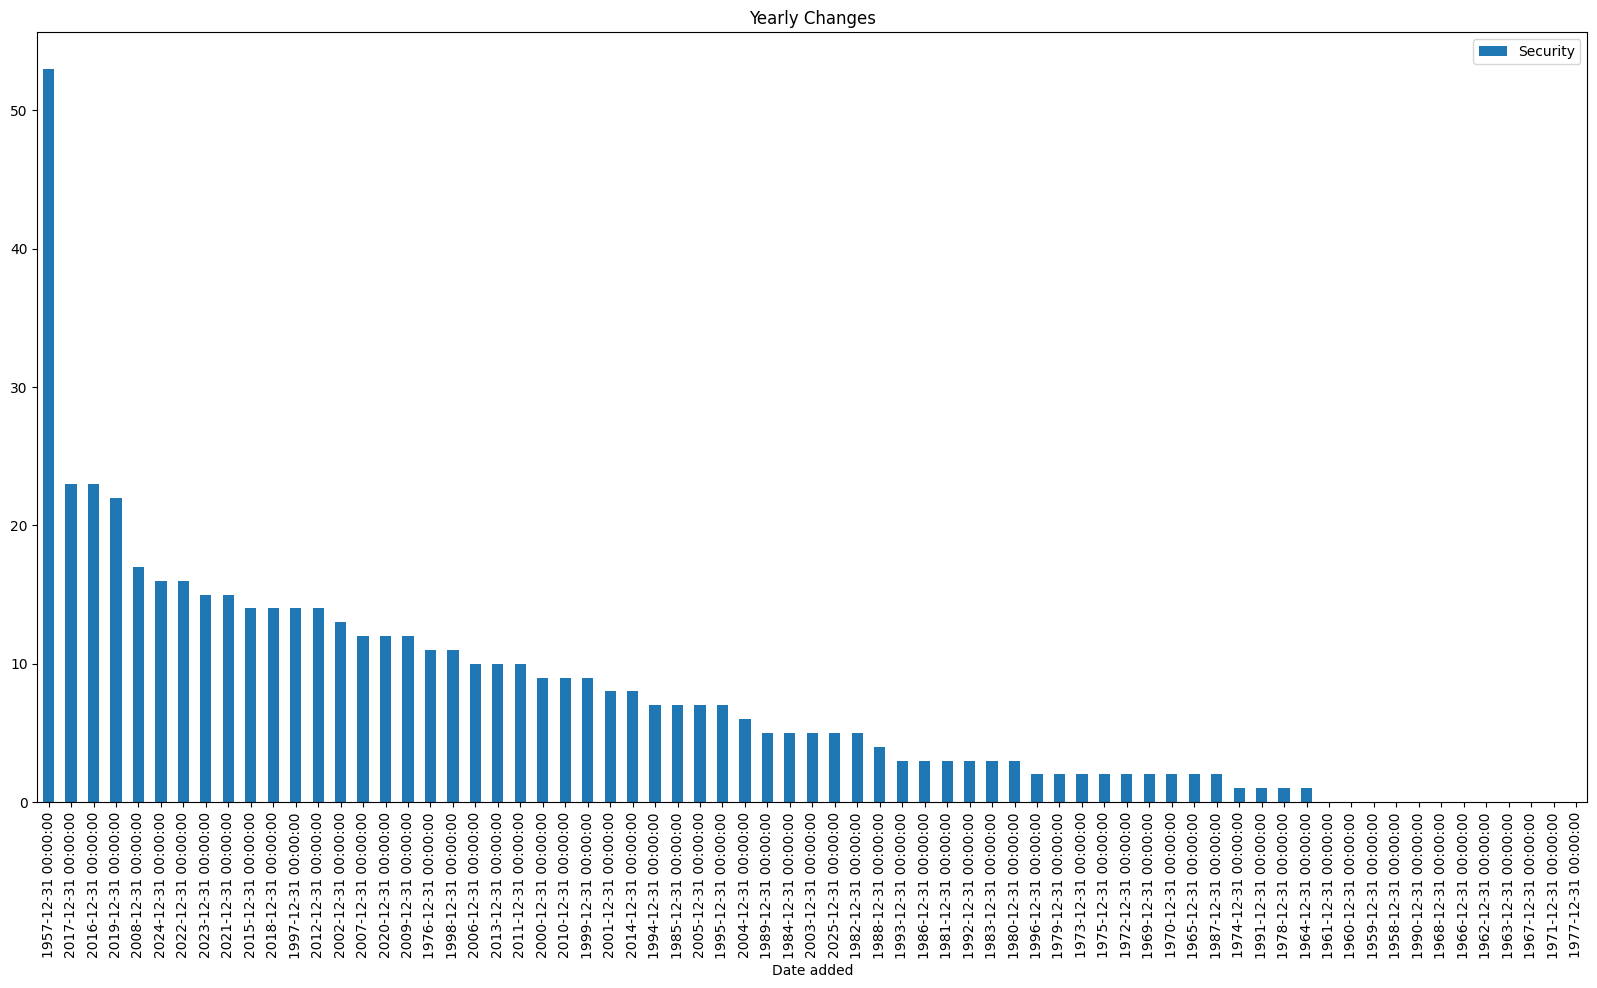

In [171]:
from matplotlib import pyplot as plt
yearly.plot(kind='bar', figsize=(20, 10), title='Yearly Changes')
plt.show()

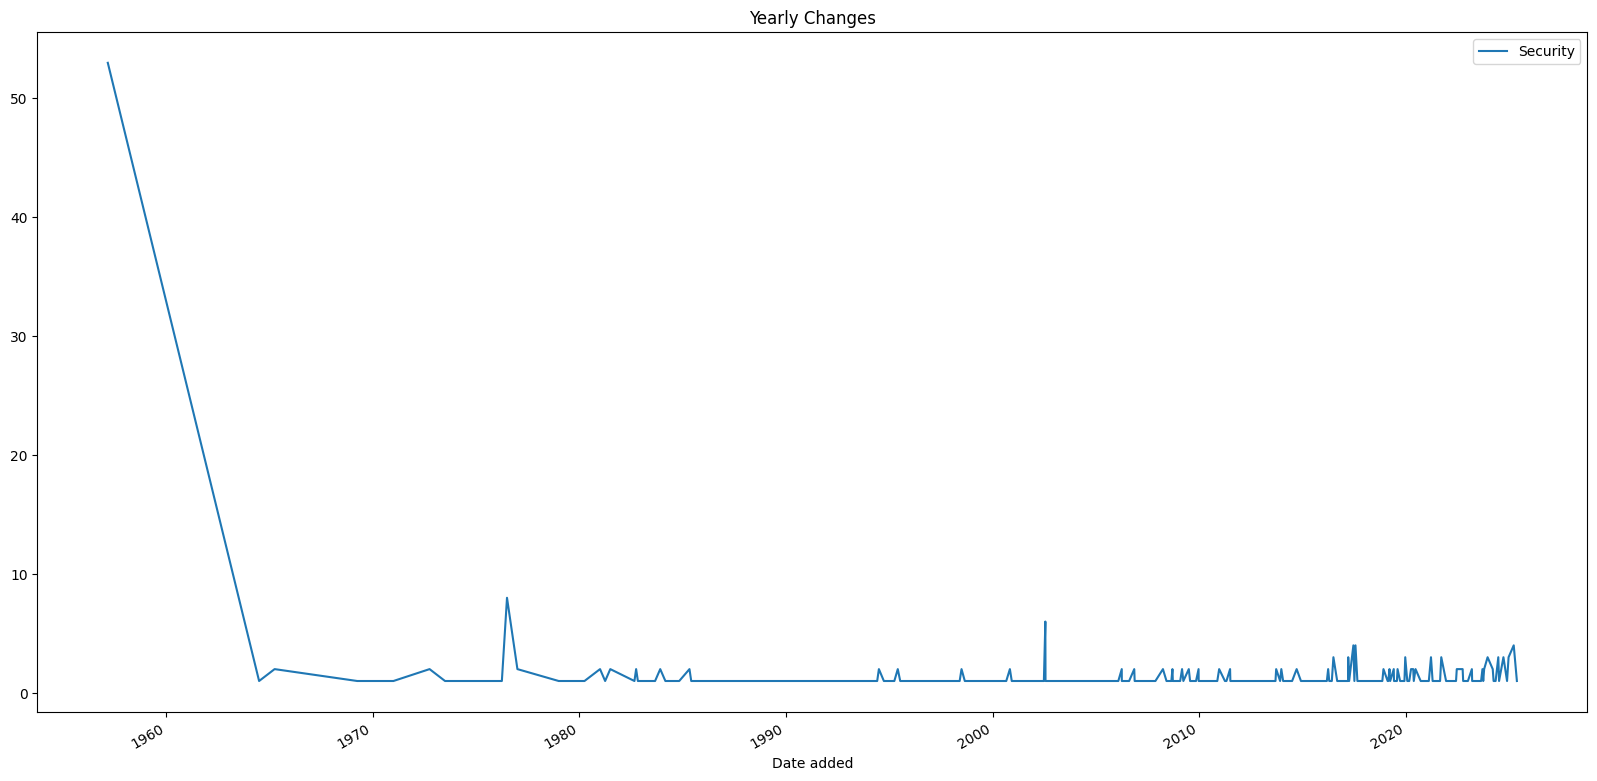

In [172]:
from matplotlib import pyplot as plt
pt.plot(kind='line', figsize=(20, 10), title='Yearly Changes')
plt.show()

In [173]:
Top3 = yearly.nlargest(3,"Security")
Top3


,Security
Date added,
1957-12-31,53
2017-12-31,23
2016-12-31,23


In [174]:
SP500Changes[('Date', 'Date')] = pd.to_datetime(SP500Changes[('Date', 'Date')])
mask = SP500Changes[('Date', 'Date')].dt.year.isin([2016, 2017])
filtered_df = SP500Changes.loc[mask]


In [175]:
filtered_df



Date  Added                                   Removed  \
          Date Ticker                          Security  Ticker   
149 2017-10-13   NCLH    Norwegian Cruise Line Holdings    LVLT   
150 2017-09-18   CDNS            Cadence Design Systems    SPLS   
151 2017-09-01   DWDP                            DuPont     DOW   
152 2017-09-01   SBAC                SBA Communications      DD   
153 2017-08-29      Q                      QuintilesIMS     WFM   
154 2017-08-08    BHF             Brighthouse Financial      AN   
155 2017-07-26    DRE                  Duke Realty Corp     RIG   
156 2017-07-26    AOS                       A. O. Smith    BBBY   
157 2017-07-26    PKG  Packaging Corporation of America     MUR   
158 2017-07-26    RMD                            ResMed     MNK   
159 2017-07-26    MGM         MGM Resorts International     RAI   
160 2017-07-07    BKR                      Baker Hughes     BHI   
161 2017-06-19    HLT                            Hilton    YHOO   
162 2017-06-19   ALGN                  Align Technology     TDC   
163 2017-06-19   ANSS                             Ansys       R   
164 2017-06-19     RE                        Everest Re     MJN   
165 2017-06-02   INFO                        IHS Markit    TGNA   
166 2017-04-05     IT                           Gartner     DNB   
167 2017-04-04    DXC                    DXC Technology     SWN   
168 2017-03-20    AMD            Advanced Micro Devices    URBN   
169 2017-03-20    RJF           Raymond James Financial     FTR   
170 2017-03-20    ARE   Alexandria Real Estate Equities    FSLR   
171 2017-03-16   SNPS                          Synopsys     HAR   
172 2017-03-13   DISH                      Dish Network    LLTC   
173 2017-03-02    REG                   Regency Centers    ENDP   
174 2017-03-01   CBOE                     Cboe Holdings     PBI   
175 2017-02-28   INCY                            Incyte      SE   
176 2017-01-05   IDXX                Idexx Laboratories     STJ   
177 2016-12-02    MAA            Mid-America Apartments      OI   
178 2016-12-02   EVHC               Envision Healthcare      LM   
179 2016-11-01   ARNC                           Arconic      AA   
180 2016-09-30   COTY                              Coty      DO   
181 2016-09-22    COO              The Cooper Companies     HOT   
182 2016-09-08   CHTR            Charter Communications     EMC   
183 2016-09-06    MTD                    Mettler Toledo     TYC   
184 2016-07-05    FTV                      Fortive Corp    CPGX   
185 2016-07-01    LNT               Alliant Energy Corp     GAS   
186 2016-07-01    ALB             Albemarle Corporation      TE   
187 2016-06-22   FBHS    Fortune Brands Home & Security     CVC   
188 2016-06-03    TDG                   TransDigm Group    BXLT   
189 2016-05-31    AJG         Arthur J. Gallagher & Co.     CCE   
190 2016-05-23    LKQ                   LKQ Corporation     ARG   
191 2016-05-18    DLR                    Digital Realty     TWC   
192 2016-05-13    ALK                  Alaska Air Group    SNDK   
193 2016-05-03    AYI                     Acuity Brands     ADT   
194 2016-04-25    GPN                   Global Payments     GME   
195 2016-04-18   ULTA                       Ulta Beauty     THC   
196 2016-04-08     UA            Under Armour (Class C)     NaN   
197 2016-04-04     FL                       Foot Locker     CAM   
198 2016-03-30   HOLX                           Hologic     POM   
199 2016-03-30    CNC               Centene Corporation     ESV   
200 2016-03-07    UDR                               UDR    GMCR   
201 2016-03-04    AWK              American Water Works     CNX   
202 2016-02-22    CXO                  Concho Resources     PCL   
203 2016-02-01    CFG                          Citizens     PCP   
204 2016-02-01    FRT   Federal Realty Investment Trust    BRCM   
205 2016-01-19    EXR               Extra Space Storage     ACE   
206 2016-01-05   WLTW              Willis Towers Watson  

In [177]:
!pip install bertopic sentence-transformers




In [228]:
# Install dependencies if not done
# !pip install bertopic sentence-transformers umap-learn plotly

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import umap.umap_ as umap
import pandas as pd
import plotly.io as pio

# OPTIONAL: Display Plotly in browser
pio.renderers.default = "browser"

# Load and clean your data
texts = SP500Changes[('Reason', 'Reason')].dropna().astype(str).tolist()

# UMAP: better tuned for short text
umap_model = umap.UMAP(
    n_neighbors=3,
    n_components=2,
    min_dist=0.1,
    metric='cosine',
    random_state=42
)

# SentenceTransformer: good for short texts
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initialize BERTopic with embedding + umap
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    language="english",
    verbose=True
)

# Fit model
topics, probs = topic_model.fit_transform(texts)

# Get topic info
topic_info = topic_model.get_topic_info()
print(topic_info.head())

# Visualize
fig = topic_model.visualize_topics()
fig = topic_model.visualize_topics()
fig.write_html("topics_visualization.html")
from google.colab import files
files.download("topics_visualization.html")


2025-06-02 02:20:06,666 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/12 [00:00<?, ?it/s]

2025-06-02 02:20:09,746 - BERTopic - Embedding - Completed ✓
2025-06-02 02:20:09,748 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-02 02:20:10,202 - BERTopic - Dimensionality - Completed ✓
2025-06-02 02:20:10,204 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-02 02:20:10,220 - BERTopic - Cluster - Completed ✓
2025-06-02 02:20:10,223 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-02 02:20:10,242 - BERTopic - Representation - Completed ✓


   Topic  Count                                    Name  \
0     -1     41  -1_change_capitalization_market_needed   
1      0    228                   0_acquired_by_off_500   
2      1     25     1_changes_market_capitalization_cap   
3      2     23       2_change_capitalization_market_54   
4      3     16   3_private_taken_rebalance_methodology   

                                      Representation  \
0  [change, capitalization, market, needed, citat...   
1  [acquired, by, off, 500, constituent, spun, an...   
2  [changes, market, capitalization, cap, 41, 107...   
3  [change, capitalization, market, 54, 55, 63, 1...   
4  [private, taken, rebalance, methodology, 181, ...   

                                 Representative_Docs  
0  [Market capitalization change.[5], Market capi...  
1  [United Technologies spun off Otis and Carrier...  
2  [Market Capitalization Changes., Market capita...  
3  [Market capitalization change.[63], Market cap...  
4  [Taken Private[253], Taken pri

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Answer to question 1:**

The Year with the most additions was 2017

D1:
* Low interest rates made it easy and cheap for companies and private equity firms to finance mergers and acquisitions.

* Private equity activity surged, leading to many public companies
being acquired and taken private, requiring replacements in the index.

* Tech and pharma companies had large cash reserves and used them to:



1. Acquire smaller companies
2. Spin off divisions
3. Restructure operations

*  Spin off divisions,Restructure operations,Anticipation of U.S. tax reform under the Trump administration led to a rush of corporate actions before policy changes took effect.

D2

* Market capitalization shifts triggered index adjustments, as companies grew or shrank relative to others.

* Structural changes to the S&P, like the creation of the Real Estate sector in 2016.

* These years were marked by unusually high corporate activity, especially in tech, pharma, and private equity  all contributing to the pike.

In [179]:
SP500ComponentStocks.columns

Index(['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date added', 'CIK', 'Founded', 'TimeInIndex'],
      dtype='object')

In [182]:
SP500ComponentStocks["TimeInIndex"]=pd.Timestamp.today()-SP500ComponentStocks["Date added"]
SP500ComponentStocks["TimeInIndex"]=SP500ComponentStocks["TimeInIndex"].dt.days/365 #Not 252 days since is datetime year, not financial.

In [180]:
Y20securities=SP500ComponentStocks[SP500ComponentStocks["TimeInIndex"]>20].sort_values(by="TimeInIndex",ascending=0).reset_index(drop=1)

In [183]:
Y20securities

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,TimeInIndex
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,68.293151
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,68.293151
2,AEP,American Electric Power,Utilities,Electric Utilities,"Columbus, Ohio",1957-03-04,4904,1906,68.293151
3,MO,Altria,Consumer Staples,Tobacco,"Richmond, Virginia",1957-03-04,764180,1985,68.293151
4,ADM,Archer Daniels Midland,Consumer Staples,Agricultural Products & Services,"Chicago, Illinois",1957-03-04,7084,1902,68.293151
...,...,...,...,...,...,...,...,...,...
214,VTRS,Viatris,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961,21.123288
215,GILD,Gilead Sciences,Health Care,Biotechnology,"Foster City, California",2004-07-01,882095,1987,20.934247
216,TMO,Thermo Fisher Scientific,Health Care,Life Sciences Tools & Services,"Waltham, Massachusetts",2004-08-03,97745,2006 (1902),20.843836
217,TPR,"Tapestry, Inc.",Consumer Discretionary,"Apparel, Accessories & Luxury Goods","New York City, New York",2004-09-01,1116132,2017,20.764384


#Clean The data:

1. understand why Date added before foundation date in some securities.

In [197]:
SP500ComponentStocks["Founded_clean"] = SP500ComponentStocks["Founded"].astype(str).str.extract(r'(\d{4})')

SP500ComponentStocks["error"] = SP500ComponentStocks.apply(
    lambda row: (
        f"Error: added in {pd.to_datetime(row['Date added'], errors='coerce').year} "
        f"but founded in {int(row['Founded_clean'])}"
    )
    if pd.notna(row["Date added"])
       and pd.notna(row["Founded_clean"])
       and pd.to_datetime(row["Date added"], errors='coerce').year < int(row["Founded_clean"])
    else None,
    axis=1
)


In [195]:
SP500ComponentStocks

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,TimeInIndex,Founded_clean,error
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,68.293151,1902,None
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,7.857534,1916,None
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,68.293151,1888,None
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),12.427397,2013,Error: added in 2012 but founded in 2013
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,13.917808,1989,None
...,...,...,...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011,13.594521,2011,None
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997,27.673973,1997,None
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969,5.446575,1969,None
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927,23.835616,1927,None


In [196]:
SP500ComponentStocks[SP500ComponentStocks["error"].notna()][["Security", "error"]].reset_index(drop=1)


,Security,error
0,AbbVie,Error: added in 2012 but founded in 2013
1,Altria,Error: added in 1957 but founded in 1985
2,Bank of America,Error: added in 1976 but founded in 1998
3,Bristol Myers Squibb,Error: added in 1957 but founded in 1989
4,Cigna,Error: added in 1976 but founded in 1982
5,Citigroup,Error: added in 1988 but founded in 1998
6,ConocoPhillips,Error: added in 1957 but founded in 2002
7,Coterra,Error: added in 2008 but founded in 2021
8,CSX Corporation,Error: added in 1957 but founded in 1980
9,CVS Health,Error: added in 1957 but founded in 1996


In [204]:
error_list = pd.DataFrame({
    "Security": [
        "AbbVie", "Altria", "Bank of America", "Bristol Myers Squibb", "Cigna", "Citigroup", "ConocoPhillips",
        "Coterra", "CSX Corporation", "CVS Health", "DTE Energy", "Elevance Health", "Exelon", "ExxonMobil",
        "JPMorgan Chase", "L3Harris", "Lockheed Martin", "Molson Coors Beverage Company", "NextEra Energy",
        "Northrop Grumman", "Paramount Global", "Simon Property Group", "Tapestry, Inc.", "Thermo Fisher Scientific",
        "TJX Companies", "Walgreens Boots Alliance"
    ],
    "error": [
        "Error: added in 2012 but founded in 2013", "Error: added in 1957 but founded in 1985",
        "Error: added in 1976 but founded in 1998", "Error: added in 1957 but founded in 1989",
        "Error: added in 1976 but founded in 1982", "Error: added in 1988 but founded in 1998",
        "Error: added in 1957 but founded in 2002", "Error: added in 2008 but founded in 2021",
        "Error: added in 1957 but founded in 1980", "Error: added in 1957 but founded in 1996",
        "Error: added in 1957 but founded in 1995", "Error: added in 2002 but founded in 2014",
        "Error: added in 1957 but founded in 2000", "Error: added in 1957 but founded in 1999",
        "Error: added in 1975 but founded in 2000", "Error: added in 2008 but founded in 2019",
        "Error: added in 1957 but founded in 1995", "Error: added in 1976 but founded in 2005",
        "Error: added in 1976 but founded in 1984", "Error: added in 1957 but founded in 1994",
        "Error: added in 1994 but founded in 2019", "Error: added in 2002 but founded in 2003",
        "Error: added in 2004 but founded in 2017", "Error: added in 2004 but founded in 2006",
        "Error: added in 1985 but founded in 1987", "Error: added in 1979 but founded in 2014"
    ]
})

# The corrected founded and S&P 500 added dates for these companies
corrections = pd.DataFrame({
    "Security": [
        "AbbVie", "Altria", "Bank of America", "Bristol Myers Squibb", "Cigna", "Citigroup", "ConocoPhillips",
        "Coterra", "CSX Corporation", "CVS Health", "DTE Energy", "Elevance Health", "Exelon", "ExxonMobil",
        "JPMorgan Chase", "L3Harris", "Lockheed Martin", "Molson Coors Beverage Company", "NextEra Energy",
        "Northrop Grumman", "Paramount Global", "Simon Property Group", "Tapestry, Inc.", "Thermo Fisher Scientific",
        "TJX Companies", "Walgreens Boots Alliance"
    ],
    "Correct Founded": [
        2012, 1985, 1998, 1989, 1982, 1998, 2002, 2021, 1980, 1963, 1995, 2014, 2000, 1999,
        2000, 2019, 1995, 2005, 1984, 1994, 2019, 2003, 2017, 2006, 1987, 2014
    ],
    "S&P 500 Added": [
        2012, 1957, 1976, 1957, 1976, 1988, 1957, 2008, 1957, 1997, 1957, 2002, 1957, 1957,
        1975, 2008, 1957, 1976, 1976, 1957, 1994, 2002, 2004, 2004, 1985, 1979
    ]
})





In [214]:
# 1. Crear diccionarios de corrección
founded_dict = dict(zip(corrections['Security'], corrections['Correct Founded']))
added_dict = dict(zip(corrections['Security'], corrections['S&P 500 Added']))


SP500ComponentStocks['Founded'] = SP500ComponentStocks.apply(
    lambda row: founded_dict[row['Security']] if row['Security'] in founded_dict else row['Founded'],
    axis=1
)


SP500ComponentStocks['Date added'] = SP500ComponentStocks.apply(
    lambda row: added_dict[row['Security']] if row['Security'] in added_dict else row['Date added'],
    axis=1
)

SP500ComponentStocks['Year Added'] = pd.to_datetime(SP500ComponentStocks['Date added'], errors='coerce').dt.year



In [216]:
current_year = datetime.now().year
SP500ComponentStocks["YearsInIndex"] = current_year - SP500ComponentStocks["Year Added"]

over_20_years_count = SP500ComponentStocks[SP500ComponentStocks["YearsInIndex"] >= 20]["Security"].nunique()

print("Número de compañías con más de 20 años en el S&P 500:", over_20_years_count)


Número de compañías con más de 20 años en el S&P 500: 229


229 companies have been in the index whether under their firs foundation name or other.